# Predicciones de ventas de conjunto de datos sales_predictions.csv

**Desarrollado por:** Orlando Patricio Chacón Molina

**Fecha de creación:** 2022-01-12

**Fecha de actualización:** 2022-01-12

In [1]:
#Importar pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import math


In [2]:
filename = "data/sales_predictions.csv"
sp_df = pd.read_csv(filename)

In [3]:
#Ver información global del dataset
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [4]:
#Ver los diez primeros registros del dataset en formato de tabla
sp_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


### Ver los valores únicos de las variables categóricas

In [5]:
# De acuerdo a los datos: ['Low Fat', 'Regular', 'low fat', 'LF', 'reg']
# aparentemente 'Low Fat','low fat' y 'LF' se refienren a la misma variable igualmente
# 'Regular' y 'reg'
print(sp_df['Item_Fat_Content'].unique())
filtroLowFat = (sp_df['Item_Fat_Content'] == 'low fat') | (sp_df['Item_Fat_Content'] == 'LF')
sp_df.loc[filtroLowFat , 'Item_Fat_Content'] = 'Low Fat'

filtroRegular = (sp_df['Item_Fat_Content'] == 'reg')
sp_df.loc[filtroRegular , 'Item_Fat_Content'] = 'Regular'

print(sp_df['Item_Fat_Content'].unique())


['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Low Fat' 'Regular']


In [6]:
sp_df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [7]:
sp_df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [8]:
sp_df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [9]:
sp_df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [10]:
sp_df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

### Valores de tendencia central de cada columna

In [11]:
sp_df.max(numeric_only=True)

Item_Weight                     21.350000
Item_Visibility                  0.328391
Item_MRP                       266.888400
Outlet_Establishment_Year     2009.000000
Item_Outlet_Sales            13086.964800
dtype: float64

In [12]:
sp_df.min(numeric_only=True)

Item_Weight                     4.555
Item_Visibility                 0.000
Item_MRP                       31.290
Outlet_Establishment_Year    1985.000
Item_Outlet_Sales              33.290
dtype: float64

In [13]:
sp_df.mean(numeric_only=True)

Item_Weight                    12.857645
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [14]:
sp_df.std(numeric_only=True)

Item_Weight                     4.643456
Item_Visibility                 0.051598
Item_MRP                       62.275067
Outlet_Establishment_Year       8.371760
Item_Outlet_Sales            1706.499616
dtype: float64

In [15]:
sp_df.var(numeric_only=True)

Item_Weight                  2.156169e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

In [16]:
sp_df.median(numeric_only=True)

Item_Weight                    12.600000
Item_Visibility                 0.053931
Item_MRP                      143.012800
Outlet_Establishment_Year    1999.000000
Item_Outlet_Sales            1794.331000
dtype: float64

In [17]:
#Muestra los principales valores estadísticos
sp_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Datos faltantes

In [18]:
#Calcular el porcentaje de datos faltantes de cada columna
sp_df.isna().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

**Rellenando datos con la media(Caso 1) y moda(Caso 2)**

In [19]:
# Copiar DataFrame por valor y no referencia como ocurriría si solo se escribe
# sp_df1 = sp_df
sp_df1 = sp_df.copy()

# Caso 1
# Rellenar los valores nan de Item_Weight con la media de los valores de Item_Weigth
# La desventaja de esta estrategia radica en se tratan a los datos como columna y
# No toma en cuenta la corellación que podría existir con el registro(fila) 
sp_df1['Item_Weight']=sp_df1['Item_Weight'].fillna(sp_df1.Item_Weight.mean())

# Caso 2
# Para el campo Outlet_Size se utiliza una estrategia similar a la usada para Item_Weight
# con la diferencia de que para este caso se calcula la moda del conjunto de datos y no la 
# media por tratarse de una columna categórica.
# Se deja comentado debido a que considero que la estrategia siguiente mantiene tendencias
# similares a las del conjunto de datos.
#modaOutletSize = sp_df1.Outlet_Size.mode()
#sp_df1['Outlet_Size']=sp_df1['Outlet_Size'].fillna(modaOutletSize.to_string())


# Caso 3 
# Llenado de acuerdo al porcentaje de participacón de cada Categoría en el conjunto de datos
# Ej 'Uno = 0.3, 'Dos': 0.4, 'Tres =0.4
# En este caso, al 30% de los datos faltantes se establecera el valor 'Uno', al 40% el valor de 'Dos'
# y 40% el valor de 'Tres'
sp_df1_1=sp_df1.copy()
modaOutletSize = sp_df1_1.Outlet_Size.mode()
sp_df1_1['Outlet_Size']=sp_df1_1['Outlet_Size'].fillna(modaOutletSize[0])


nNaOutletSize = sp_df1[['Outlet_Size']].isna().sum().Outlet_Size
categoriasNa = round(sp_df1[['Outlet_Size','Item_Weight']].groupby('Outlet_Size').count()/sp_df1['Outlet_Size'].count() * nNaOutletSize)
categoriasNa = categoriasNa.astype(int)

#categoriasNa(columns = ['Item_Weight ='cantidad'])
for index,val in categoriasNa['Item_Weight'].items():
    sp_df1['Outlet_Size']=sp_df1['Outlet_Size'].fillna(index,limit=val)
sp_df1['Outlet_Size']=sp_df1['Outlet_Size'].fillna(index)

sp_df1['Outlet_Size']


0       Medium
1       Medium
2       Medium
3         High
4         High
5       Medium
6         High
7       Medium
8         High
9         High
10      Medium
11       Small
12      Medium
13       Small
14        High
15       Small
16      Medium
17      Medium
18      Medium
19       Small
20        High
21      Medium
22       Small
23       Small
24       Small
25        High
26       Small
27        High
28        High
29       Small
         ...  
8493     Small
8494     Small
8495     Small
8496     Small
8497     Small
8498    Medium
8499     Small
8500     Small
8501     Small
8502     Small
8503     Small
8504    Medium
8505    Medium
8506    Medium
8507     Small
8508     Small
8509     Small
8510     Small
8511    Medium
8512      High
8513     Small
8514     Small
8515    Medium
8516    Medium
8517     Small
8518      High
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

**Completar los datos faltantes en la columna Item_Weight con la media de sus valores**

In [20]:
sp_df['Item_Weight'] = sp_df['Item_Weight'].fillna(sp_df['Item_Weight'].mean()) 

In [21]:
sp_df.groupby('Outlet_Identifier').max()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Identifier,,,,,,,,,,,
OUT010,NCZ54,21.350000,Regular,0.311090,Starchy Foods,266.6884,1998,NaN,Tier 3,Grocery Store,1775.6886
OUT013,NCZ53,21.350000,Regular,0.185705,Starchy Foods,266.6884,1987,High,Tier 3,Supermarket Type1,10256.6490
OUT017,NCZ42,21.250000,Regular,0.188620,Starchy Foods,266.8884,2007,NaN,Tier 2,Supermarket Type1,9664.7528
OUT018,NCZ54,21.350000,Regular,0.188323,Starchy Foods,265.1884,2009,Medium,Tier 3,Supermarket Type2,6768.5228
OUT019,NCZ54,12.857645,Regular,0.328391,Starchy Foods,266.5884,1985,Small,Tier 1,Grocery Store,1482.0708
OUT027,NCZ54,12.857645,Regular,0.183948,Starchy Foods,265.2884,1985,Medium,Tier 3,Supermarket Type3,13086.9648
OUT035,NCZ42,21.350000,Regular,0.187523,Starchy Foods,266.5884,2004,Small,Tier 2,Supermarket Type1,8479.6288
OUT045,NCZ54,21.250000,Regular,0.187939,Starchy Foods,265.7884,2002,NaN,Tier 2,Supermarket Type1,8994.9580
OUT046,NCZ54,21.350000,Regular,0.187559,Starchy Foods,266.8884,1997,Small,Tier 1,Supermarket Type1,9779.9362


In [22]:
sp_df.groupby('Outlet_Identifier').sum()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Identifier,,,,,
OUT010,7166.800000,56.308832,78131.5646,1108890,1.883402e+05
OUT013,12121.730000,55.879859,131809.0156,1851884,2.142664e+06
OUT017,11877.495000,56.834646,129103.9564,1858482,2.167465e+06
OUT018,11946.465000,56.621454,131477.7724,1864352,1.851823e+06
OUT019,6788.836657,57.257041,73807.5824,1048080,1.796941e+05
OUT027,12021.898247,54.804764,130714.6746,1855975,3.453926e+06
OUT035,11931.295000,56.974873,133103.9070,1863720,2.268123e+06
OUT045,11751.840000,56.180780,130942.7782,1859858,2.036725e+06
OUT046,11966.125000,56.231875,132113.3698,1857210,2.118395e+06


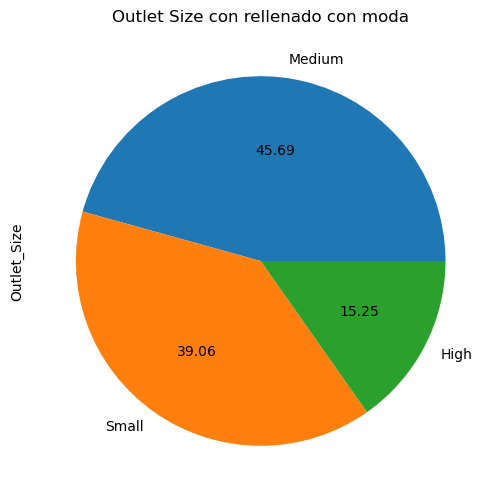

In [23]:
# Gráfico de pastel del porcentaje de participación de cada 'Outlet_Size' del conjunto de datos original
# Omitiendo los valores faltantes
plt.style.use('default')
sp_df['Outlet_Size'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Outlet Size con rellenado con moda')

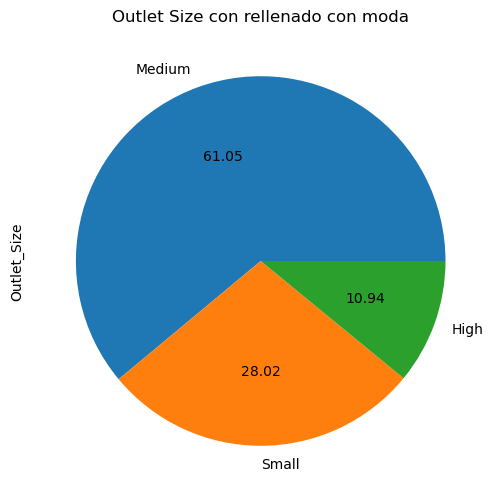

In [24]:
# Gráfico de pastel del porcentaje de participación de cada 'Outlet_Size' del conjunto de datos
# que se rellenó los datos faltantes con la moda
sp_df1_1['Outlet_Size'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Outlet Size con rellenado con moda')

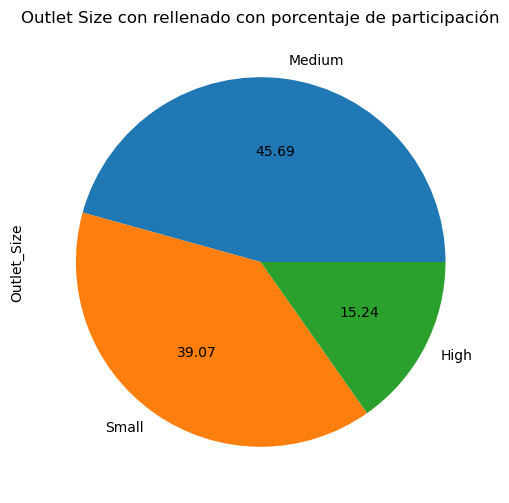

In [25]:
# Gráfico de pastel del porcentaje de participación de cada 'Outlet_Size' del conjunto de datos
# que se rellenó de acuerdo al porcentaje de participación de cada 'Outlet_Size'
# con lo cual las tendencias, prácticamente, se mantienen similares a las observadas
# en el conjunto de datos original, por lo que se opta por esta estrategia de reemplazo
sp_df1['Outlet_Size'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Outlet Size con rellenado con porcentaje de participación');

**Verificación de datos faltantes luego de aplicar el método .fillna()**

In [26]:
sp_df1.isna().mean()*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [27]:
sp_df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Gráficos

In [28]:
cumsumOutletYear = sp_df.groupby('Outlet_Establishment_Year').nunique('Outlet_Identifier')['Outlet_Identifier'].cumsum()
sp_df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

## Gráfico de la cantidad de locales existentes cada año
Este gráfico corresponde a la suma acumulada de establecimientos abiertos cada año.
Suponiendo ninguno se ha cerrado, la suma acumulada corresponderá a los locales existente en un año determinado.

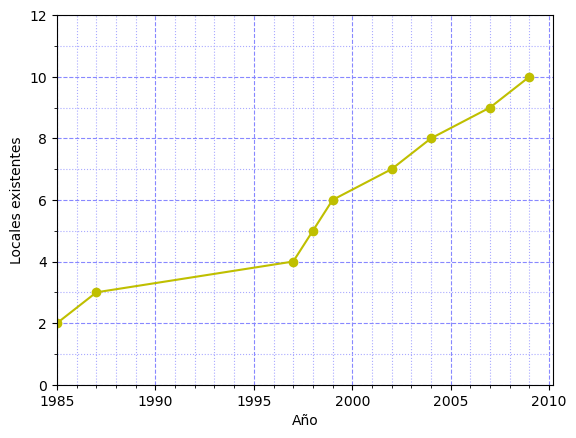

In [29]:
# Importar librerias para crear subgrids
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

# Crear subplot
fig, ax = plt.subplots(1,1)

#Graficar en color amarillo y marcador 'o'
ax.plot(cumsumOutletYear,marker='o',c="y")

#Establecer límites en x & y
ax.set_xlim(left=1985)
ax.set_ylim(bottom=0, top=12)

# Establecer líneas mayores de la grilla
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(2))

#Establecer líneas menores de la grilla
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Dibujar grilla, establcer colores y estilo de línea
ax.grid(which='major', color='#88F', linestyle='--')
ax.grid(which='minor', color='#AAF', linestyle=':')

ax.set_xlabel('Año')
ax.set_ylabel('Locales existentes');


In [30]:
sp_df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
sumaVentas = sp_df1['Item_Outlet_Sales'].sum() # Obtiene la suma total de ventas de producto en el establecimiento
ventasOutletSize = round(sp_df1.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum(),2) # Suma de total de ventas por tamaño de establecimiento  
ventasOutletSize

Outlet_Size
High      2832051.54
Medium    9536050.33
Small     6223023.54
Name: Item_Outlet_Sales, dtype: float64

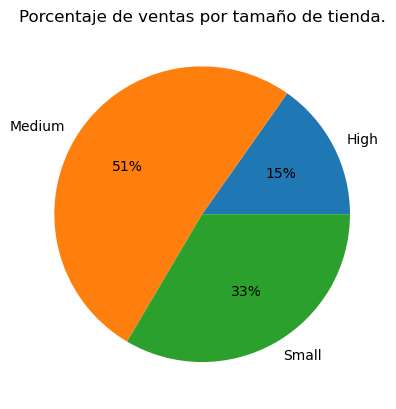

In [32]:
fig, ax = plt.subplots(1,1) # Crear un subplot
ax.set_title('Porcentaje de ventas por tamaño de tienda.') # Establecer título
ax.pie(ventasOutletSize, labels=ventasOutletSize.index, autopct='%1.0f%%'); # Graficar

## Gráfico de ventas de acuerdo al tipo de ubicación del establecimiento y el contenido de grasa del producto.


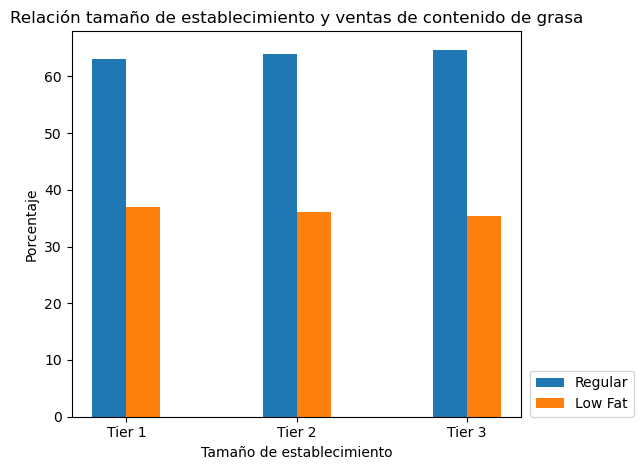

In [33]:
# Se obtiene el total de ventas agrupado por la columna 'Outlet_Location_Type' y el resultado 
# se vuelve a convertir a DataFrame
ventasOutletLocation = sp_df1.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum().to_frame()
ventasOutletLocation['Outlet_Location_Type']=ventasOutletLocation.index # Se crea una nueva columna y se asigna el valor del índice
ventasOutletLocation.reset_index(drop=True, inplace=True) # Se elimina el índice

# Se obtiene el total de ventas agrupado por 'Outlet_Location_Type' e 'Item_Fat_Content'
ventasOutletLocationFat = round(sp_df1.groupby(['Outlet_Location_Type','Item_Fat_Content'])['Item_Outlet_Sales'].sum().sort_index(),2)

# Se convierte a DataFrame y se desapila la agrupación
ventasOutletLocationFat = ventasOutletLocationFat.to_frame().unstack()['Item_Outlet_Sales']
ventasOutletLocationFat['Outlet_Location_Type']=ventasOutletLocationFat.index # Se crea una nueva columna y se asigna el valor del índice
ventasOutletLocationFat.reset_index(drop=True, inplace=True) # Se elimina el índice

# Se combinan los dataframes ventasOutletLocationFat y ventasOutletLocation teniendo como llave a la columna 'Outlet_Location_Type'
ventasOutletLocationFat = ventasOutletLocationFat.join(ventasOutletLocation.set_index('Outlet_Location_Type'),on='Outlet_Location_Type')

# Se obtiene el valor porcentual para las columnas 'Low Fat' y 'Regular' dividiendo para el total de ventas en cada 'Outlet_Location_Type'
# y multiplicándolo por 100
ventasOutletLocationFat['Low Fat']=round(100*ventasOutletLocationFat['Low Fat']/ventasOutletLocationFat['Item_Outlet_Sales'],2)
ventasOutletLocationFat['Regular']=round(100*ventasOutletLocationFat['Regular']/ventasOutletLocationFat['Item_Outlet_Sales'],2)

# Se definen los labels para el grpafico
labels = ventasOutletLocationFat['Outlet_Location_Type']

#Se obtienen los valores para el gráfico 
lowFat = ventasOutletLocationFat['Low Fat'].values
regular = ventasOutletLocationFat['Regular'].values

x = np.arange(len(labels)) # Se define un arreglo numpy de longitud igual a labels
width = 0.2 #Ancho de cada barra

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lowFat, width, label='Regular')
rects2 = ax.bar(x + width/2, regular, width, label='Low Fat')

ax.set_ylabel('Porcentaje')
ax.set_xlabel('Tamaño de establecimiento')
ax.set_title('Relación tamaño de establecimiento y ventas de contenido de grasa')


#importar librería para formateo de ticks
from matplotlib.ticker import FuncFormatter
# Establecer valores para xticks(Tier 1, Tier 2, Tier 2) 
ax.set_xticks(x) # Asignar etiquetas en el eje x (sintaxis matplotlib 3.5) 
def format_fn(tick_val, tick_pos):
    return labels[int(tick_val)]
ax.xaxis.set_major_formatter(FuncFormatter(format_fn))

ax.legend(loc=(1.02,0))


fig.tight_layout()

In [34]:
sp_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [35]:
df3 = sp_df.copy();
df3['Outlet_Size'] = df3['Outlet_Size'].fillna('No establecido')
df_oi_os = df3.groupby(['Outlet_Identifier','Outlet_Size']).count()['Outlet_Type'].to_frame()
df_oi_os.groupby(['Outlet_Size']).count()

,Outlet_Type
Outlet_Size,
High,1
Medium,3
No establecido,3
Small,3


## Gráfico porcentual de ventas por sucursal

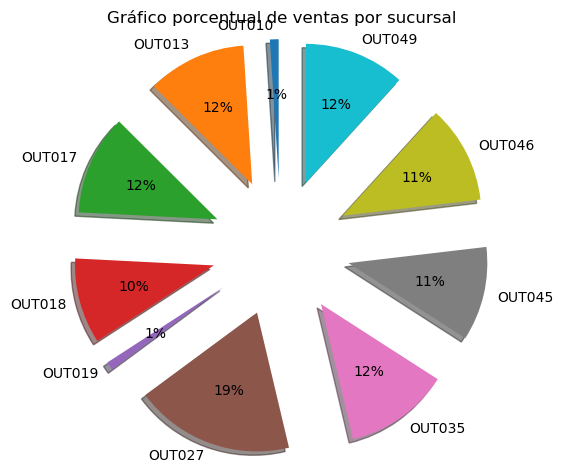

In [36]:
# Obtener el total de ventas por sucursal
df_oi_os = df3.groupby(['Outlet_Identifier']).sum()['Item_Outlet_Sales'].to_frame()
df_oi_os = round(df_oi_os['Item_Outlet_Sales'],2)


fig, ax = plt.subplots(1,1) # Crear un subplot
fig.suptitle('Gráfico porcentual de ventas por sucursal') # Establecer título superior

# Lista de dimnsion 'len(df_oi_os.index)' para separar (explode) las rebanadas del gráfico
# en este caso 0.5
explode= [0.5]*len(df_oi_os.index) 

# Graficar 
ax.pie(labels=df_oi_os.index, explode=explode, x=df_oi_os.values,autopct='%1.0f%%',shadow=True, startangle=90);
fig.tight_layout() # Ajustar la figura


# Parte 4

In [37]:
df4 = sp_df1.copy()
df4.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Histogramas

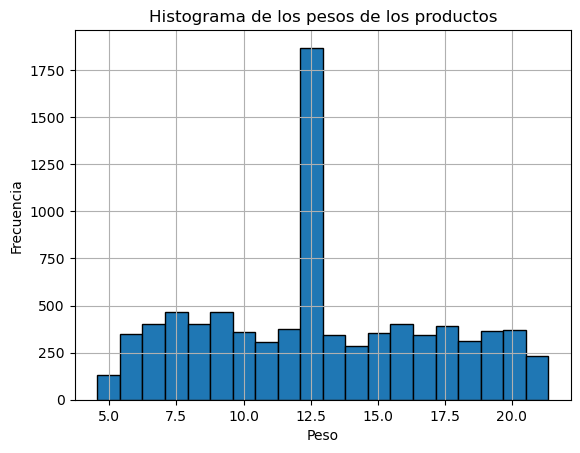

In [38]:
fig, ax = plt.subplots(1,1)
ax.hist(df4['Item_Weight'], bins=20,edgecolor='#000')
ax.grid()
ax.set_title('Histograma de los pesos de los productos')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia');


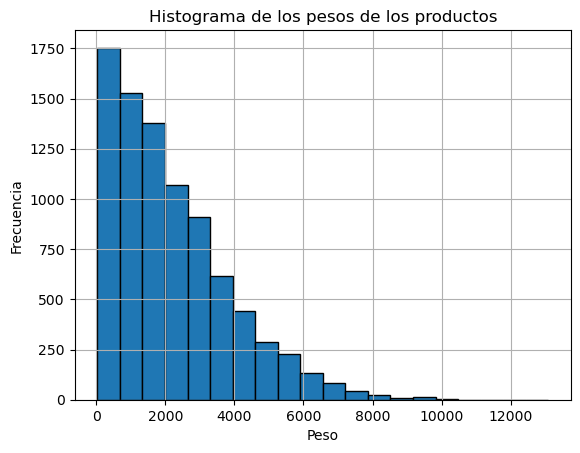

In [39]:
fig, ax = plt.subplots(1,1)
ax.hist(df4['Item_Outlet_Sales'], bins=20,edgecolor='#000')
ax.grid()
ax.set_title('Histograma de los pesos de los productos')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia');

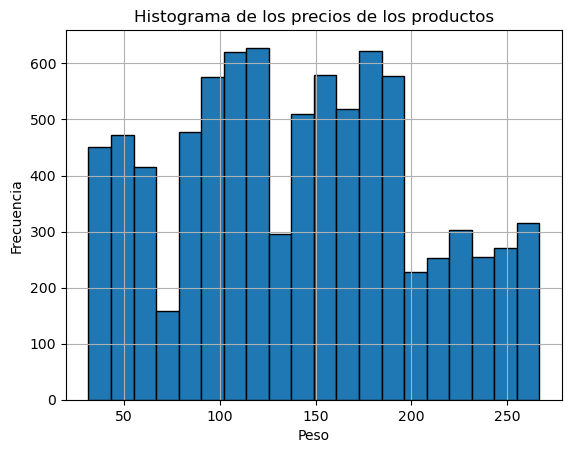

In [40]:
fig, ax = plt.subplots(1,1)
ax.hist(df4['Item_MRP'], bins=20,edgecolor='#000')
ax.grid()
ax.set_title('Histograma de los precios de los productos')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia');

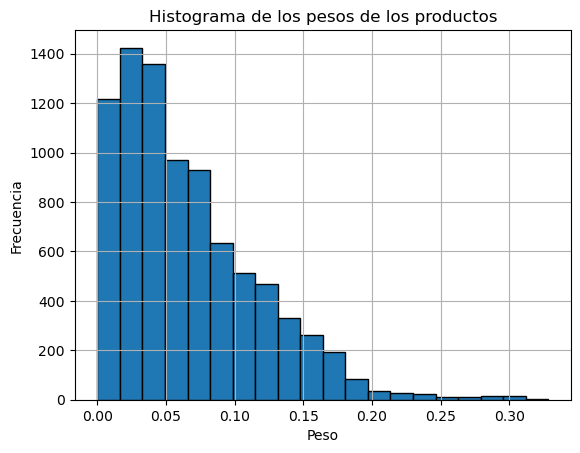

In [41]:
fig, ax = plt.subplots(1,1)
ax.hist(df4['Item_Visibility'], bins=20,edgecolor='#000')
ax.grid()
ax.set_title('Histograma de los pesos de los productos')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia');

array([ 9.3 ,  5.92, 17.5 , ..., 10.6 ,  7.21, 14.8 ])

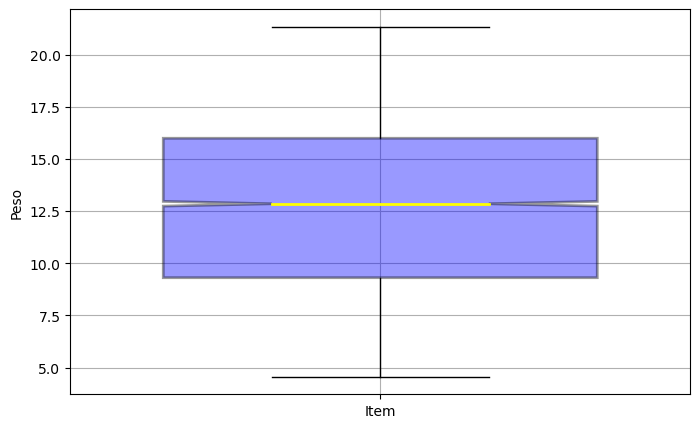

In [42]:
itemWeight = df4.loc[:,'Item_Weight'].values

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5)) # Se define un subplot

# Gráfico de caja y bigotes
plots = ax.boxplot(itemWeight,labels=['Item'],
            notch = True,
            widths = .7,
            patch_artist=True,
            medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
            boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4));

ax.set_ylabel('Peso')
ax.grid()

itemWeight

[249.8092 141.618   53.8614 ... 214.5218  85.1224  75.467 ]


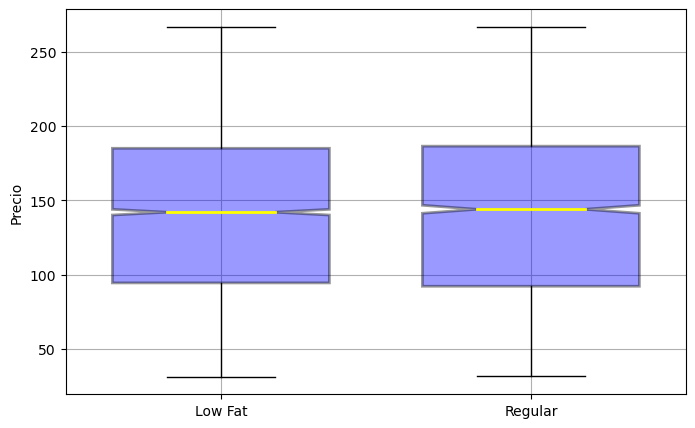

In [43]:
regularFilter = df4['Item_Fat_Content']=='Regular'
itemMrpLowFat = df4.loc[~regularFilter,'Item_MRP'].values
itemMrpRegular = df4.loc[regularFilter,'Item_MRP'].values
print(itemMrpLowFat)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5)) # Se define un subplot

# Gráfico de caja y bigotes
plots = ax.boxplot([itemMrpLowFat,itemMrpRegular],labels=['Low Fat','Regular'],
            notch = True,
            widths = .7,
            patch_artist=True,
            medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
            boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4));

ax.set_ylabel('Precio')
ax.grid()


En el gráfico anterior se observa que el contenido de grasa no tiene un mayor impacto en el precio del producto 

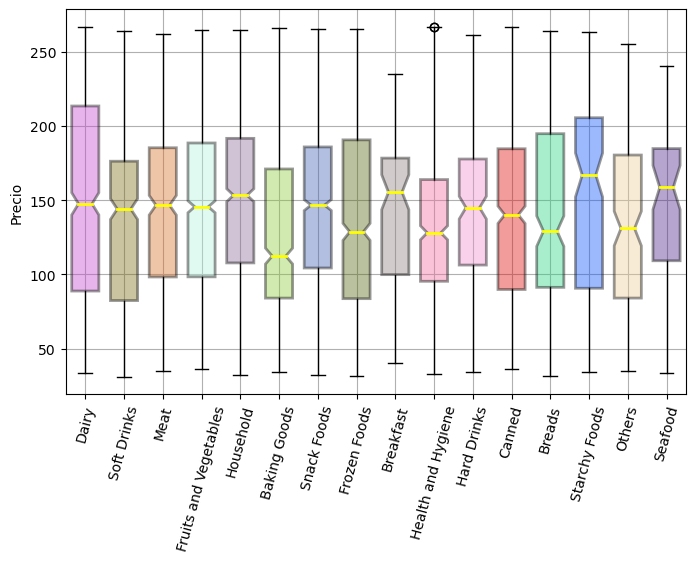

In [44]:
itemTypePrices = []
itemTypeLabels = []

# Se crean, dinámicamente, filtros para cada tipo de producto
# y se agregan la lista de precios a un array
# paralemente se llena la lista de labels, en las mismas posiciones que 
# los precios. Con estas dos listas se creará el diagrama de caja y bigotes
for itemType in df4['Item_Type'].unique():
    itemTypeFilter = df4['Item_Type']==itemType
    itemTypePrices.append(df4.loc[itemTypeFilter,'Item_MRP'].values)
    itemTypeLabels.append(itemType)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5)) # Se define un subplot

# Gráfico de caja y bigotes
plots = ax.boxplot(itemTypePrices,labels=itemTypeLabels,
            notch = True,
            widths = .7,
            patch_artist=True,
            medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
            boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4))

boxplots = plots['boxes']

random.seed(5269) # Establecer semilla (Replicable)

# Funcion para obtener un número aleatorio entre 0 y 255
# https://stackoverflow.com/a/14019260
r = lambda: random.randint(0,255)

for boxplot in boxplots:
    color ='#%02X%02X%02X' % (r(),r(),r()) #Generar color exadecimal
    boxplot.set_facecolor(color) # Establecer color aleatorio

plt.xticks(rotation=75)
ax.set_ylabel('Precio')
ax.grid()


En el gráfico anterior se grafican diagramas de caja y bigotes del precios de productos. Cada diagrama corresponde a los precios de los productos de un tipo específico. En este gráfico se observa que depensiendo del tipo de producto, los rangos de precios varían.

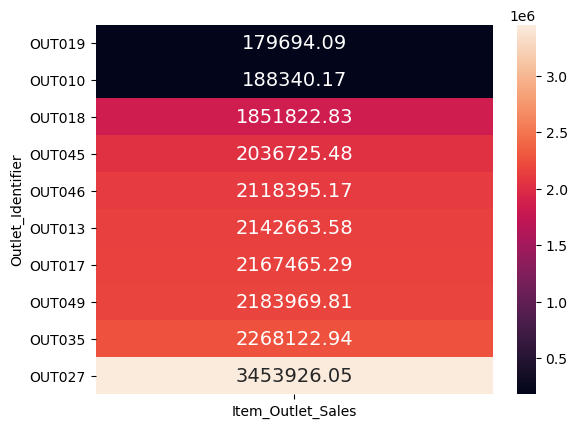

In [45]:
sns.heatmap(df4.groupby('Outlet_Identifier').sum()[['Item_Outlet_Sales']].sort_values('Item_Outlet_Sales'), annot=True,
                  annot_kws={"fontsize":14},
                  fmt='.2f'
            )


Mapa de calor unidimensional, de suma de ventas por sucursal

## Predicción ItemOutletSales con KNN

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sp_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

#### 1. Utilizando Solo las variables continuas y sin escalado

In [47]:
filename = "data/sales_predictions.csv"
dfKnn = pd.read_csv(filename)

dfKnn = dfKnn.drop(columns='Item_Identifier')

dfKnn['Item_Fat_Content'] = dfKnn['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}).to_frame()
dfKnn['Item_Weight'] = dfKnn['Item_Weight'].fillna(dfKnn['Item_Weight'].mean())

columnName ='Outlet_Size'
dfKnn['count__']=1
countDf = dfKnn[dfKnn[columnName].isna()]['count__'].count()*dfKnn[[columnName,'count__']].groupby(columnName).count()/dfKnn[~dfKnn[columnName].isna()]['count__'].count()
countDf = countDf['count__'].apply(lambda x: math.ceil(x)).to_dict()
for index, lim in countDf.items():
    dfKnn[columnName] = dfKnn[columnName].fillna(index,limit=lim)


X = dfKnn.loc[:,['Item_Weight', 'Item_Visibility','Item_MRP']]
y = dfKnn.loc[:,'Item_Outlet_Sales']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=9993)

# Regresor KNN
neigh = KNeighborsRegressor(n_neighbors=20)
neigh.fit(X_train, y_train)

TestPredDf = pd.DataFrame(y_test)
TestPredDf['Item_Outlet_Sales_Pred']=neigh.predict(X_test)

print("R2 = ", r2_score(y_test,neigh.predict(X_test)))

TestPredDf.head()


R2 =  0.274185902100745


,Item_Outlet_Sales,Item_Outlet_Sales_Pred
4599,161.1236,1211.45639
6410,5672.6160,3063.17935
6177,612.5360,1589.09815
6970,1416.8224,1210.45769
1276,1228.4010,1188.15339


En este primer caso, utilizando Knn únicamente las variables continuas, y sin escalamiento se han obtenido predicciones demasiado alejadas de la realidas un valor de $R^2 = 0.27$.

Por esta razón, en la siguiente sección se implementará KNN utilizando las variables continuas.

### 2. Utilizando todas las variables.
* Se codifican las variables con el algoritmo One Hot Encoding (Disponible como librería en sklearn)
* Se escalan las variables para evitar sesgos debido a la magnitud de las variables

In [48]:
# Mostrar los valores únicos de cada columna de dfN, cuando el numero de valores 
# unicos es mayor al parámetros nMax

def uniqueVals (dfN, nMax=20):
    columns = dfN.columns
    uniqueDf={}
    for column in columns:
        uniqueArray = dfN[column].unique()
        if(len(uniqueArray)<=nMax):
            uniqueDf[column]=uniqueArray
    return uniqueDf

In [49]:
def fillNanMajority(inputeDf, columnName):
    pass

filename = "data/sales_predictions.csv"
dfKnn = pd.read_csv(filename)

dfKnn = dfKnn.drop(columns='Item_Identifier')

dfKnn['Item_Fat_Content'] = dfKnn['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}).to_frame()
dfKnn['Item_Weight'] = dfKnn['Item_Weight'].fillna(dfKnn['Item_Weight'].mean())

columnName ='Outlet_Size'
dfKnn['count__']=1
countDf = dfKnn[dfKnn[columnName].isna()]['count__'].count()*dfKnn[[columnName,'count__']].groupby(columnName).count()/dfKnn[~dfKnn[columnName].isna()]['count__'].count()
countDf = countDf['count__'].apply(lambda x: math.ceil(x)).to_dict()
for index, lim in countDf.items():
    dfKnn[columnName] = dfKnn[columnName].fillna(index,limit=lim)

In [50]:
"""
['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']
"""


enc = OneHotEncoder()
encDf=pd.DataFrame()
#encItemFatContent = enc.fit_transform(dfKnn[['Item_Fat_Content']]).toarray()
#encItemVisibility = enc.fit_transform(dfKnn[['Item_Type']]).toarray()

#encItemFatContent = pd.DataFrame(encItemFatContent)
#enc.get_feature_names()
y = dfKnn.loc[:,'Item_Outlet_Sales']
inputeDf = dfKnn.drop(columns=['Item_Outlet_Sales'])
inputeDf = pd.concat([dfKnn.select_dtypes(exclude='object'), 
              pd.DataFrame(enc.fit_transform(dfKnn.select_dtypes('object')).toarray().astype(int))],
              axis=1)
print(inputeDf.shape)


(8523, 44)


In [51]:
X = inputeDf.loc[:,:]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [52]:
mejorR2 = 0
mejorN = 0
maxN = 30 + 1
printR = ''
for n in range(1,maxN):
    # Dividir el cunjunto de datos en entrenamiento y pruebas
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=9993)

    # Regresor KNN
    neigh = KNeighborsRegressor(n_neighbors=n)

    # Ajustar
    neigh.fit(X_train, y_train)

    # Creando el dataframe con los valores esperados y los valores esperados
    # y los valores estimados a partir del modelo
    # en la primera columna se encuentran los valores reales(Item_Outlet_Sales)
    # en la segunda columna los valores estimados(Item_Outlet_Sales_Pred)
    TestPredDf = pd.DataFrame(y_test)
    TestPredDf['Item_Outlet_Sales_Pred']=neigh.predict(X_test)

    # Mostrar el valor de R^2
    r2 = r2_score(y_test,TestPredDf['Item_Outlet_Sales_Pred'])
    printR = printR + f"R2({n}) = {round(r2,2)}\t"
    if n % 5 ==0 and n!=0:
        printR = printR + "\n"
    if r2 > mejorR2:
        mejorN = n
        mejorR2 = r2
    # Mostrar los primeros resultados de los valores reales y los valores estimador
print(printR)

R2(1) = 0.78	R2(2) = 0.81	R2(3) = 0.8	R2(4) = 0.79	R2(5) = 0.77	
R2(6) = 0.76	R2(7) = 0.75	R2(8) = 0.74	R2(9) = 0.73	R2(10) = 0.72	
R2(11) = 0.71	R2(12) = 0.7	R2(13) = 0.7	R2(14) = 0.69	R2(15) = 0.68	
R2(16) = 0.68	R2(17) = 0.67	R2(18) = 0.66	R2(19) = 0.66	R2(20) = 0.65	
R2(21) = 0.65	R2(22) = 0.64	R2(23) = 0.63	R2(24) = 0.62	R2(25) = 0.62	
R2(26) = 0.62	R2(27) = 0.61	R2(28) = 0.61	R2(29) = 0.6	R2(30) = 0.6	



In [53]:
print (f"Se han probado desde 1 hasta {maxN-1} vecinos.\nSe ha determinado que {mejorN} produce el mayor ajuste respecto a R2.\nR2={mejorR2}")

Se han probado desde 1 hasta 30 vecinos.
Se ha determinado que 2 produce el mayor ajuste respecto a R2.
R2=0.8083426777426512


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=9993)

# Regresor KNN
neigh = KNeighborsRegressor(n_neighbors=mejorN)

# Ajustar
neigh.fit(X_train, y_train)

# Creando el dataframe con los valores esperados y los valores esperados
# y los valores estimados a partir del modelo
# en la primera columna se encuentran los valores reales(Item_Outlet_Sales)
# en la segunda columna los valores estimados(Item_Outlet_Sales_Pred)
TestPredDf = pd.DataFrame(y_test)
TestPredDf['Item_Outlet_Sales_Pred']=neigh.predict(X_test)

# Mostrar el valor de R^2
r2 = r2_score(y_test,TestPredDf['Item_Outlet_Sales_Pred'])
print(f"R2({mejorN}) = {r2}")
# Mostrar los primeros resultados de los valores reales y los valores estimador

TestPredDf.head()

R2(2) = 0.8083426777426512


,Item_Outlet_Sales,Item_Outlet_Sales_Pred
4599,161.1236,165.7842
6410,5672.6160,6450.9362
6177,612.5360,1140.5154
6970,1416.8224,606.2109
1276,1228.4010,1098.5700


Utilizando One Hot Encoding como algoritmo de codificación, escalando las variables y probando iterativamente el algoritmo desde 1 hasta 30 vecinos se ha logrado ajustar el modelo hasta obtener $R^2 \approx 0.81$